In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [3]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [4]:
df.columns = [['Exp','Sal']]
df.head()

,Exp,Sal
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
df.corr()

,Exp,Sal
Exp,1.000000,0.978242
Sal,0.978242,1.000000


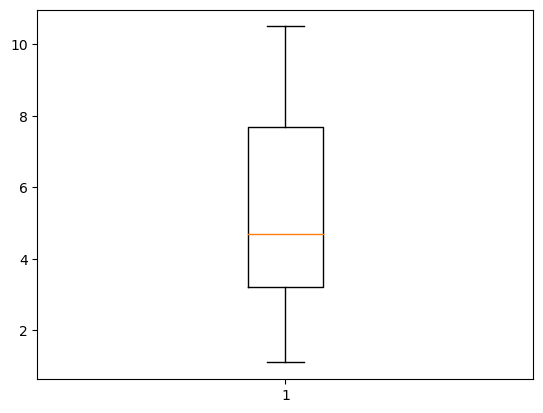

In [6]:
plt.boxplot(df.Exp)
plt.show()

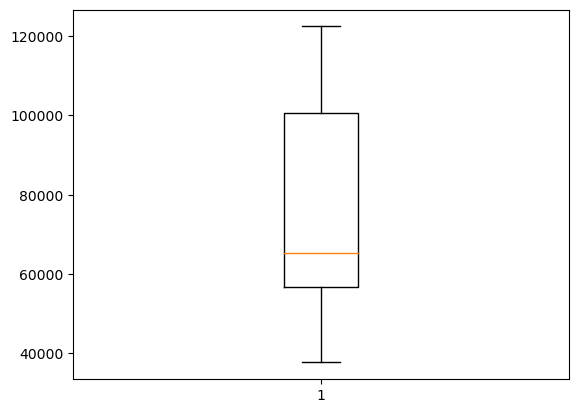

In [7]:
plt.boxplot(df.Sal)
plt.show()

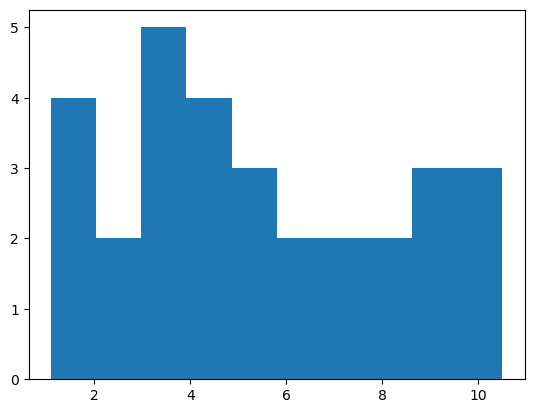

In [13]:
plt.hist(df["Exp"])
plt.show()

<AxesSubplot:ylabel='Density'>

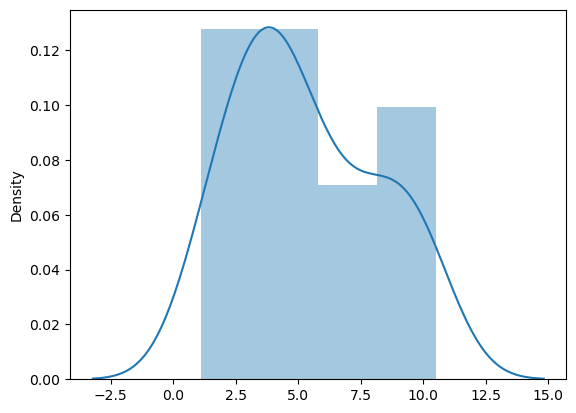

In [14]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.distplot(df['Exp'])


<AxesSubplot:ylabel='Density'>

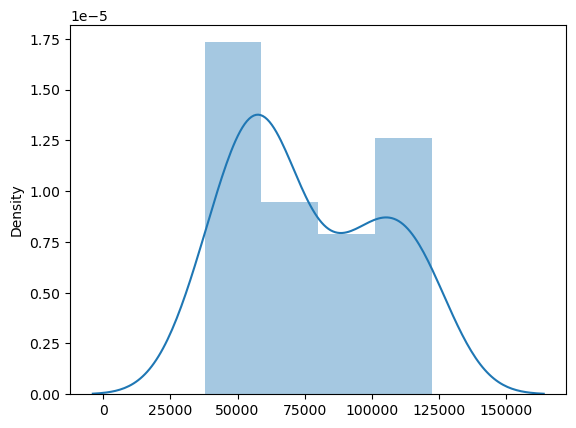

In [15]:
sns.distplot(df['Sal'])

Text(0.5, 1.0, 'Scatter plot')

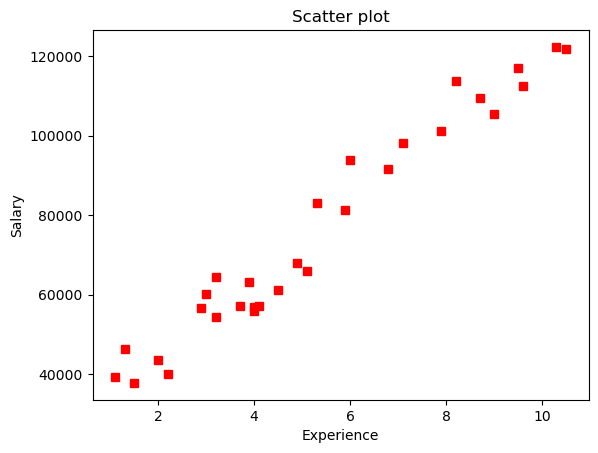

In [19]:
plt.plot(df.Exp, df.Sal,"rs")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Scatter plot")

In [51]:
import statsmodels.formula.api as smf
model = smf.ols("Sal~Exp",data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Sal   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 03 Aug 2023   Prob (F-statistic):           1.14e-20
Time:                        21:19:25   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
Exp         9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel="('Exp',)", ylabel="('Sal',)">

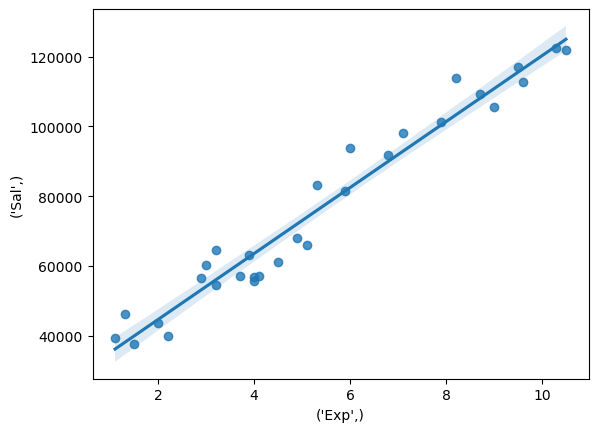

In [32]:
sns.regplot(x = 'Exp',y ='Sal',data = df)

In [33]:
model.tvalues, model.pvalues

(Intercept    11.346940
 Exp          24.950094
 dtype: float64,
 Intercept    5.511950e-12
 Exp          1.143068e-20
 dtype: float64)

In [34]:
model.params

Intercept    25792.200199
Exp           9449.962321
dtype: float64

In [52]:
model.rsquared

0.9569566641435086

In [35]:
model.resid

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

In [40]:
pred = model.predict(df.Exp)
pred.iloc[1:10]

1    38077.151217
2    39967.143681
3    44692.124842
4    46582.117306
5    53197.090931
6    54142.087163
7    56032.079627
8    56032.079627
9    60757.060788
dtype: float64

In [43]:
rmse_lin = np.sqrt(np.mean((np.array(df["Exp"])-np.array(pred))**2))
rmse

3.335811419420491e+19

Text(0, 0.5, 'Salary')

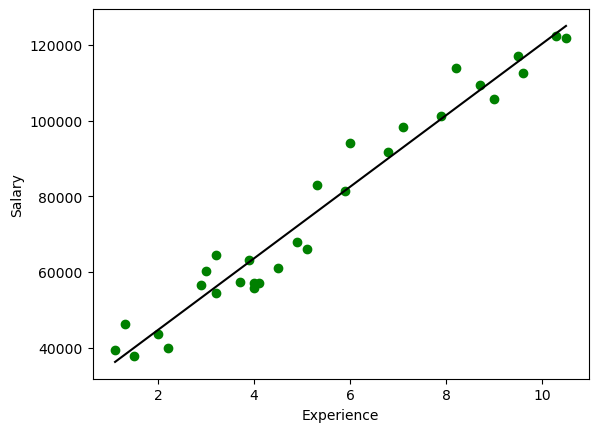

In [45]:
plt.scatter(x = df["Exp"], y =df["Sal"], color = "green")
plt.plot(df.Exp,pred,color ="black")
plt.xlabel("Experience")
plt.ylabel("Salary")


In [53]:
#After we get the Accuracy of the 95% it is the highest %


Text(0, 0.5, 'standardized Residual')

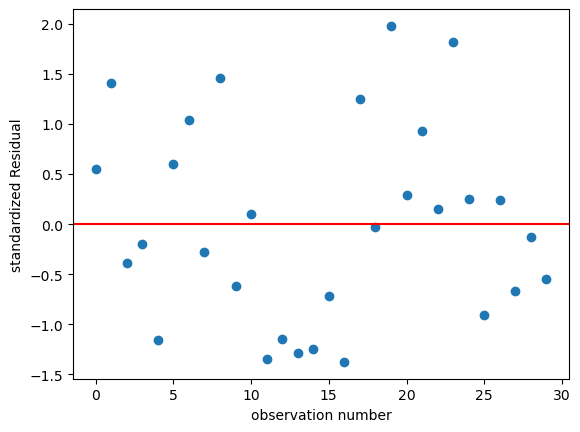

In [54]:
plt.scatter(np.arange(30), model.resid_pearson)
# resid_pearson gives the standradized values for the errors
# means all the errors going to convert it Z-scores
plt.axhline(y=0, color= 'red')
plt.xlabel("observation number")
plt.ylabel("standardized Residual")

In [55]:
#Predict the new datapoint for the data


In [57]:
new_data = {"Exp" :pd.Series([1,2])}
df4 = pd.DataFrame(new_data)
y = model.predict(df4)
y

0    35242.162520
1    44692.124842
dtype: float64